In [16]:
import pandas as pd

In [17]:
df = pd.read_csv('blog_crawling.csv')

In [18]:
import re

def pre_process(text):
    # 특수 기호 삭제
    text = re.sub('[^a-zA-z0-9가-힣ㄱ-ㅎㅏ-ㅣ.,"""%@]', '',text).strip()
    # 이메일 등장하면, 그 뒷문장 모두 삭제
    text = re.sub('[a-zA-Z0-9] + \@[a-zA-Z0-9]+\.[a-z]{1,3}.[a-z]{1,3}.+', '',text).strip()
    text = text.replace('\d+', '')
    
    return text

In [19]:
df['content'] = df['content'].map(lambda x : pre_process(x))
df.head()

,author,title,content,tokens
0,네이버 법률,'민식이법' 촉발 40대 운전자에 금고 2년…처벌 더 무거워진다,그러나법시행이후에도운전자에게지나치게불리한내용이라는민식이법논란은계속되고있습니다.A씨에...,"그러나,지나치,불리,라는,논란,계속,집행유예,아닌,실형,선고,지나치"
1,달콤쉬럽,김포 스쿨존서 무면허·과속운전으로 민식이법 첫구속,민식이법은지난해9월충남아산의한초등학교스쿨존에서교통사고로사망한고김민식사망당시9세군사건...,"지난해,초등,학교,세군,사건,계기,됐으며"
2,노게임 - nogame,25일 시행되는 민식이법 내용 정리,"민식이를숨지게했던사건,민식이법이생기게된사건에대해서잠깐적어보겠습니다.운전자A씨는시속2...","숨지,사건,생기,사건,대해서,잠깐,시속,23,km,주행,반대편,차선,신호,기다리"
3,쉼표가 있는 대중교...,"'민식이법'에 부담 느낀 버스기사들, 스쿨존 버스노선 제외",일명민식이법에부담을느낀버스기사들의요청으로스쿨존통과버스노선을변경하기로했습니다.지난6일...,"부담,느낀,버스,기사,요청,통과,버스,노선,변경,지난,부담,스러워,버스,기사,요청"
4,원자력안전위원회 공식블로...,"민식이법, 어린이보호구역 강화 대책 본격 추진",민식이법2019년9월충남아산의한어린이보호구역에서사망한김민식군사고이후발의되어2020년...,"보호,발의,법안,법안"


In [20]:
stop_word = ['식이', '에서', '습니다', '어린이', '으로', '이법', '충남', '이민식', '에게' 
             '아산', '스쿨', '2019', '25', '부터', '입니다', '김민식', '는데요', '..', '당시', '특정', '이후',
             '내용', '합니다', '부산', '지만', '해운대', '라고', '다는', '서민식', '고민식', '사고', '이보호',
            '운전자', '다고', '때문', '교통사고', '시행', '보호구역', '적용', '에게', '부모', '이름', '아이', '요즘',
             '사례', '는데', '따라', '대한', '이법이', '도록', '아니', '만들', '사망', '구역', '교통', '어린', '국회'
            ,'아산', '2020', '30', '...', '올해', '세요', '법안', '통과', '발의']
from konlpy.tag import Mecab
def postagging_mecab(text):
    mecab = Mecab()
    text = mecab.morphs(text)
    text = [i for i in text if len(i)>1]
    text = [i for i in text if i not in stop_word]
    return text

In [21]:
def make_tokens(df,filename):
    df['tokens'] = ''
    tokens_list=[]
    for i, row in df.iterrows():
        if i%100==0:
            print(i,'/',len(df))
        token = postagging_mecab(df['content'][i])
        df['tokens'][i] = ','.join(token)
    df.to_csv(filename,index = False)
    return df

In [22]:
df = make_tokens(df,'blog_crawling.csv')

0 / 500
100 / 500
200 / 500
300 / 500
400 / 500


In [23]:
df.head()

,author,title,content,tokens
0,네이버 법률,'민식이법' 촉발 40대 운전자에 금고 2년…처벌 더 무거워진다,그러나법시행이후에도운전자에게지나치게불리한내용이라는민식이법논란은계속되고있습니다.A씨에...,"그러나,지나치,불리,라는,논란,계속,집행유예,아닌,실형,선고,지나치"
1,달콤쉬럽,김포 스쿨존서 무면허·과속운전으로 민식이법 첫구속,민식이법은지난해9월충남아산의한초등학교스쿨존에서교통사고로사망한고김민식사망당시9세군사건...,"지난해,초등,학교,세군,사건,계기,됐으며"
2,노게임 - nogame,25일 시행되는 민식이법 내용 정리,"민식이를숨지게했던사건,민식이법이생기게된사건에대해서잠깐적어보겠습니다.운전자A씨는시속2...","숨지,사건,생기,사건,대해서,잠깐,시속,23,km,주행,반대편,차선,신호,기다리"
3,쉼표가 있는 대중교...,"'민식이법'에 부담 느낀 버스기사들, 스쿨존 버스노선 제외",일명민식이법에부담을느낀버스기사들의요청으로스쿨존통과버스노선을변경하기로했습니다.지난6일...,"부담,느낀,버스,기사,요청,버스,노선,변경,지난,부담,스러워,버스,기사,요청"
4,원자력안전위원회 공식블로...,"민식이법, 어린이보호구역 강화 대책 본격 추진",민식이법2019년9월충남아산의한어린이보호구역에서사망한김민식군사고이후발의되어2020년...,보호


In [24]:
tokens = []
for i in range(len(df)):
    tokens += df['tokens'][i].split(',')
            
    
total = pd.DataFrame(tokens)
total = pd.DataFrame(total[0].value_counts('')).rename(columns={0:'total'})
total = total.reset_index()
total

,index,total
0,처벌,51
1,학교,42
2,개정,41
3,놀이,39
4,사건,37
...,...,...
2259,이딴,1
2260,일어난다,1
2261,미수,1
2262,라면서,1


In [25]:
keyword = []
key_word = []
for i in range(len(total)):
    if total['total'][i] >= 30:
        keyword.append(total['total'][i])
        key_word.append(total['index'][i])
B = dict(zip(key_word, keyword))
B


{'처벌': 51,
 '학교': 42,
 '개정': 41,
 '놀이': 39,
 '사건': 37,
 '발생': 35,
 '도로': 35,
 '관련': 33,
 '안전': 33,
 '개정안': 33,
 '지난': 32,
 '강화': 30,
 '중처': 30,
 '보호': 30,
 '범죄': 30}

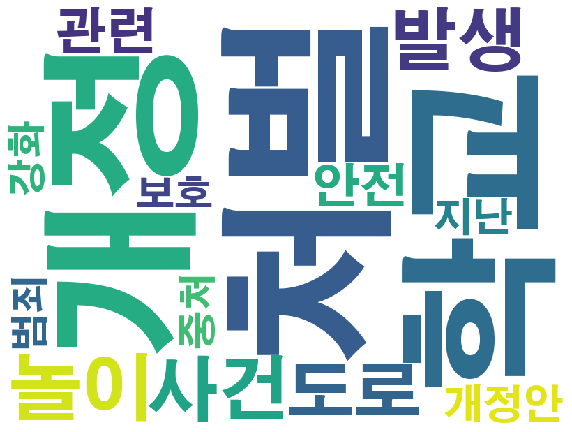

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
font_path = 'C:\Windows\Fonts\HYGTRE.ttf'
wc = WordCloud(font_path = font_path, background_color = 'white', width = 800, height = 600)
cloud = wc.generate_from_frequencies(B)
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)

In [28]:
import numpy as np
import PIL.Image as pilimg
im = pilimg.open('어린이보호구역표지판.png')
pix = np.array(im)
from wordcloud import ImageColorGenerator

FileNotFoundError: [Errno 2] No such file or directory: '어린이보호구역표지판.png'

In [29]:
font_path = 'C:\Windows\Fonts\HYGTRE.ttf'
wc = WordCloud(font_path = font_path, relative_scaling = 0.2, mask = pix, background_color = 'white', width = 800, height = 600)
cloud = wc.generate_from_frequencies(B)
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud, interpolation = 'bilinear')


NameError: name 'pix' is not defined